In [4]:
#pip install pandas pyarrow
import pandas as pd
import numpy as np

In [5]:
pwd()

'/Users/sohamdas/Desktop/EECS 545/Project'

In [6]:
eeg_sample_id = 568657
train_data = pd.read_csv('data/train.csv')
print(train_data.shape)
sample_index = train_data.index[train_data['eeg_id'] == eeg_sample_id][0]
spec_sample_id = train_data.iloc[sample_index,]['spectrogram_id']
print(spec_sample_id)

(106800, 15)
789577333


In [7]:
file_path = 'data/train_spectrograms/' + str(spec_sample_id) + '.parquet'
print(file_path)
data = pd.read_parquet(file_path, engine='pyarrow')

data/train_spectrograms/789577333.parquet


In [8]:
cols = data.columns
print(cols)

Index(['time', 'LL_0.59', 'LL_0.78', 'LL_0.98', 'LL_1.17', 'LL_1.37',
       'LL_1.56', 'LL_1.76', 'LL_1.95', 'LL_2.15',
       ...
       'RP_18.16', 'RP_18.36', 'RP_18.55', 'RP_18.75', 'RP_18.95', 'RP_19.14',
       'RP_19.34', 'RP_19.53', 'RP_19.73', 'RP_19.92'],
      dtype='object', length=401)


In [9]:
data.shape

(308, 401)

In [10]:
data['time']

0        1
1        3
2        5
3        7
4        9
      ... 
303    607
304    609
305    611
306    613
307    615
Name: time, Length: 308, dtype: int64

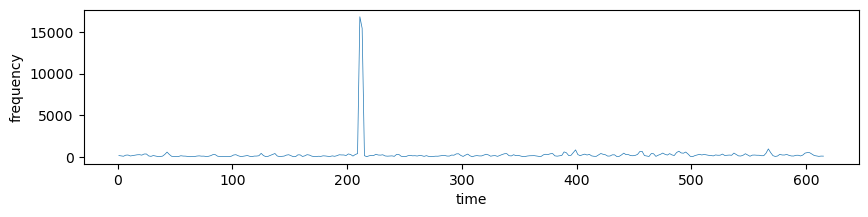

In [11]:
import matplotlib.pyplot as plt

col = 'LL_0.59'
plt.figure(figsize=(10, 2))
plt.plot(data['time'], data[col], linewidth=0.5)
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x12f5e2e90>,
 'caps': [<matplotlib.lines.Line2D at 0x12f5fc710>,
 'boxes': [<matplotlib.lines.Line2D at 0x12f58dbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x12f5fded0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12f5e3ad0>],
 'means': []}

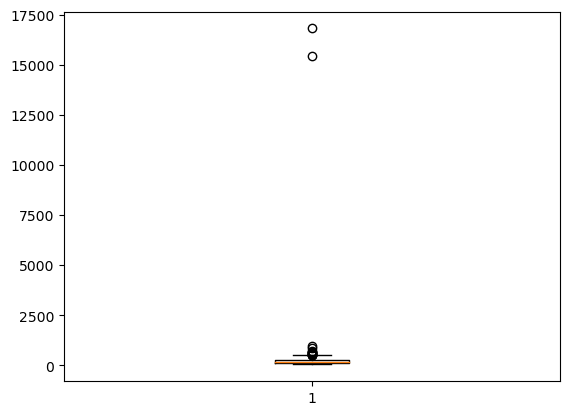

In [9]:
plt.boxplot(data[col])

In [10]:
pd.Series(train_data['spectrogram_id']).value_counts()

764146759     1022
1974785580     836
1391458063     743
1863712617     703
577118473      562
              ... 
1164733645       1
1754426211       1
1754584116       1
359281171        1
1052278850       1
Name: spectrogram_id, Length: 11138, dtype: int64

In [11]:
len(pd.Series(train_data['spectrogram_id']).value_counts())

11138

In [14]:
data.shape

(308, 401)